In [4]:
from NBEATS import NBEATS_PROFHIT
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import evaluation
import seaborn as sns
sns.set_theme('notebook', 'white')

In [8]:
models_dict = {
    'NBEATS' : NBEATS_PROFHIT
}
recon = [0.1, 0.5, 1]
seed = ['CRPS']
runs = [0,1,2]

eval_PROFHIT, Y_fin, recon_loss = evaluation('PROFHIT', models_dict, recon, seed, runs)
recon_loss = pd.read_pickle('./utils/recon_loss.pkl')

/tmp/ipykernel_107729/2066209067.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([0.1,0.5,1])


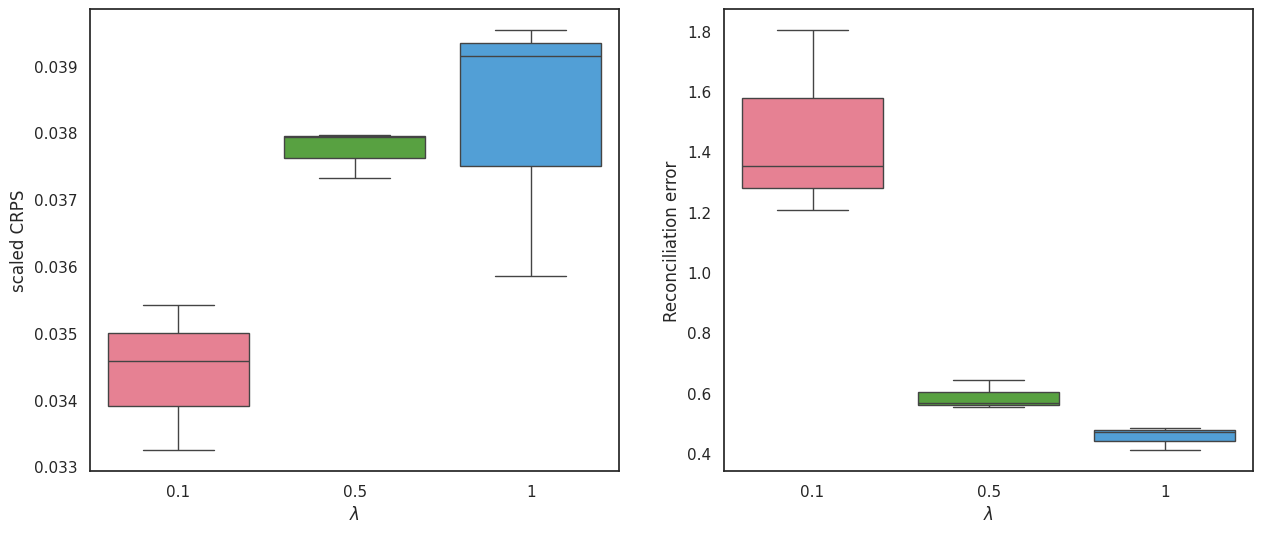

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (15,6), sharex = True)
sns.boxplot(eval_PROFHIT.iloc[-3,2:].values.reshape(3,-1).T, palette = 'husl', ax = axs[0])
sns.boxplot(np.array(recon_loss).reshape(3,-1), palette = 'husl', ax= axs[1])
axs[0].set_ylabel('scaled CRPS')
axs[1].set_ylabel('Reconciliation error')
axs[0].set_xticklabels([0.1,0.5,1])
axs[0].set_xlabel('$\lambda$')
axs[1].set_xlabel('$\lambda$')
plt.savefig('./reconciliation_tradeoff', dpi = 400, transparent=True)